In [1]:
# import plotting libraries
import matplotlib.pyplot as plt

from matplotlib import style

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from gensim.models import Word2Vec

Matplotlib is building the font cache; this may take a moment.


ImportError: cannot import name 'triu' from 'scipy.linalg' (D:\ANACONDA\Lib\site-packages\scipy\linalg\__init__.py)

In [2]:
# define training data
# sentences = [
#     ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 	['this', 'is', 'the', 'second', 'sentence'],
# 	['yet', 'third', 'sentence'],
# 	['one', 'fourth', 'sentence'],
# 	['and', 'the', 'fifth', 'sentence']]

In [3]:
# define training data
sentences = [
    ['data', 'science', 'Machine', 'AI', 'learning', 'analytics', 'word2vec'],
    ['Machine', 'AI', 'learning','Machine', 'AI', 'learning','Machine', 'AI', 'learning'],
	['soccer', 'rugby', 'playing', 'soccer field', 'big'],
	['yet', 'third', 'sentence'],
	['one', 'fourth', 'sentence'],
	['and', 'the', 'fifth', 'sentence']]

In [4]:
# train model
model = Word2Vec(sentences=sentences, vector_size=2, min_count=1)

In [5]:
# summarize the loaded model
print(model)

Word2Vec(vocab=20, vector_size=2, alpha=0.025)


In [6]:
# Get the list of words in the vocabulary
words_in_vocab = model.wv.index_to_key
words_in_vocab

['Machine',
 'AI',
 'learning',
 'sentence',
 'fifth',
 'rugby',
 'science',
 'analytics',
 'word2vec',
 'soccer',
 'playing',
 'the',
 'soccer field',
 'big',
 'yet',
 'third',
 'one',
 'fourth',
 'and',
 'data']

In [7]:
# Get the frequency of a specific word
word = "learning"
frequency = model.wv.get_vecattr(word, "count")
frequency

4

In [8]:
# Get the vector for a specific word
vector = model.wv.get_vector(word)
vector

array([-0.4651475 , -0.35584044], dtype=float32)

In [9]:
model.wv[word]

array([-0.4651475 , -0.35584044], dtype=float32)

In [10]:
from scipy.spatial import distance

In [11]:
# Compute the Cosine distance between 1-D arrays
distance.cosine(model.wv['data'], model.wv['science'])

1.8276093006134033

In [12]:
cosine_sim = 1 - distance.cosine(model.wv['data'], model.wv['science'])
cosine_sim

-0.8276093006134033

A cosine similarity value of -0.8276093006134033 indicates that the two vectors being compared are somewhat dissimilar and have an angle of approximately 135 degrees between them in the vector space. 

In [13]:
import numpy as np

In [14]:
# method - 2 - using numpy
# manually compute cosine similarity
dot = np.dot(model.wv['data'], model.wv['science'])
norma = np.linalg.norm(model.wv['data'])
normb = np.linalg.norm(model.wv['science'])
cos = dot / (norma * normb)

print("Cosine similarity is {}".format(cos))
print("Cosine distance   is {}".format(1-cos))

Cosine similarity is -0.8276093006134033
Cosine distance   is 1.8276093006134033


In [15]:
# save model
model.save('model.bin')

In [16]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=20, vector_size=2, alpha=0.025)


In [17]:
# Get all word vectors
all_vectors = model.wv.vectors
all_vectors

array([[-0.02681136,  0.01182157],
       [ 0.25516748,  0.45046365],
       [-0.4651475 , -0.35584044],
       [ 0.32294363,  0.4486494 ],
       [-0.2507714 , -0.18816859],
       [ 0.36928058, -0.07674848],
       [-0.22683066,  0.32770258],
       [-0.24300802, -0.09080088],
       [ 0.14382899,  0.04959369],
       [-0.4141709 , -0.47247273],
       [ 0.3655883 ,  0.2535131 ],
       [ 0.33788466,  0.03814328],
       [ 0.31759265, -0.1702941 ],
       [-0.0472302 ,  0.28839684],
       [-0.37608188, -0.19680518],
       [-0.37557912, -0.04650211],
       [ 0.47690594, -0.36595833],
       [-0.11668843, -0.09688705],
       [ 0.40387183, -0.2965448 ],
       [ 0.00225812, -0.2376867 ]], dtype=float32)

#### Plot Word Vectors Using PCA

In [18]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

In [19]:
pca    = PCA(n_components=2)
result = pca.fit_transform(all_vectors)

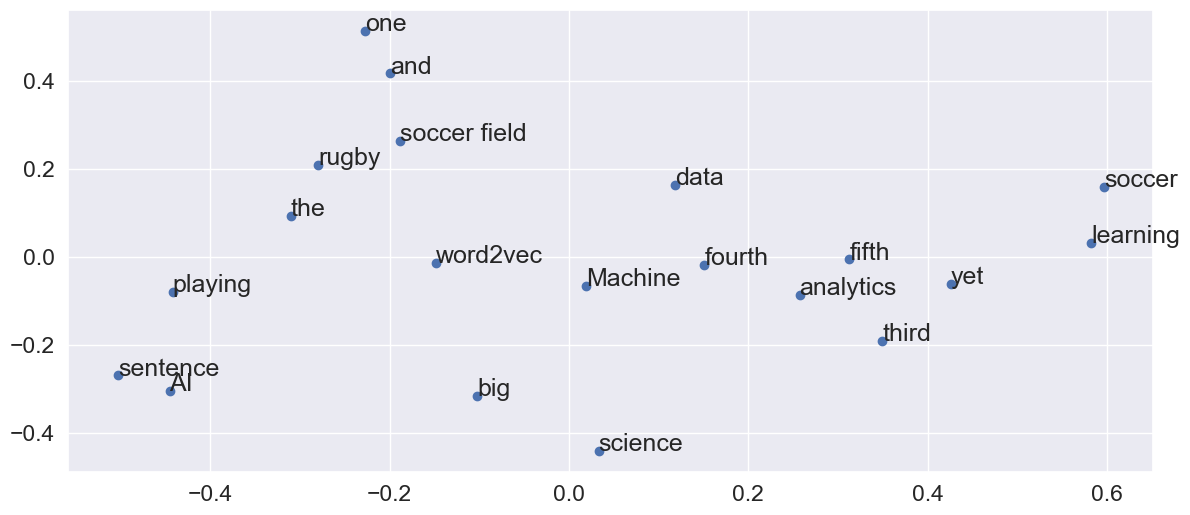

In [23]:
plt.figure(figsize=(14, 6))
plt.scatter(result[:, 0], result[:, 1])

# Get the list of words in the vocabulary
words = model.wv.index_to_key


for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

#### Example 2

#### Load Google’s Word2Vec Embedding
- Training your own word vectors may be the best approach for a given NLP problem.

- But it can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some expertise in finessing the input data and training algorithm.

- An alternative is to simply use an existing `pre-trained word embedding`.

- A pre-trained model is nothing more than a file containing tokens and their associated word vectors. 

- The pre-trained Google `word2vec model` was trained on `Google news data` (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.

It is a 1.53 Gigabytes file. You can download it from here: GoogleNews-vectors-negative300.bin.gz https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit



In [20]:
from gensim.models import KeyedVectors

In [21]:
# load the google word2vec model
filename = r'D:\AI-DATASETS\02-MISC-large\Glove\GoogleNews-vectors-negative300.bin'

In [22]:
model    = KeyedVectors.load_word2vec_format(filename, 
                                             binary= True, 
                                             limit = 100000)

In [23]:
model.vector_size

300

In [24]:
# Get the vocabulary size
vocab_size = len(model.key_to_index)

print("Vocabulary size:", vocab_size)

Vocabulary size: 100000


#### Examples

calculate: (king - man) + woman = ?

In [25]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

result

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087166428565979)]

In [26]:
result = model.most_similar(positive=['India', 'Riyadh'], negative=['Bangalore'], topn=4)

result

[('Saudi_Arabia', 0.7524830102920532),
 ('Saudi', 0.7031731009483337),
 ('Saudis', 0.6339676380157471),
 ('Saudi_Arabian', 0.6122680306434631)]

what if the token is not in the model

In [27]:
result = model.most_similar(positive=['India', 'London'], negative=['Delhi'], topn=4)

result

[('UK', 0.6248663067817688),
 ('Britain', 0.607151985168457),
 ('Europe', 0.5445290207862854),
 ('Asia', 0.5214443206787109)]

In [28]:
result = model.most_similar(positive=['India', 'Karachi'], negative=['Bangalore'], topn=4)

result

[('Pakistan', 0.7550593614578247),
 ('Bangladesh', 0.6441815495491028),
 ('Balochistan', 0.6238784790039062),
 ('Lahore', 0.6214929819107056)]

#### Example 3

In [68]:
import re  # For preprocessing
import pandas as pd  # For data handling

pd.set_option('display.max_colwidth', 120)

from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

This dataset contains the characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989. It can be found here: https://www.kaggle.com/ambarish/fun-in-text-mining-with-simpsons/data (~25MB)

In [71]:
df = pd.read_csv(r'D:\AI-DATASETS\02-MISC-large\simpsons_dataset.csv')
df.shape

(158314, 2)

In [73]:
df.sample(5)

,raw_character_text,spoken_words
122356,Bart Simpson,I wanted them till I got them! But this year I'm gettin' my dirt bike.
60515,Lisa Simpson,Got that right. / Durn tootin'. / Boy howdy.
10317,Laura Powers,Just follow me. Put your hand on my hip.
46885,Homer Simpson,"If you're trying to scare me, it won't work. I'm one hundred percent focused on my goal. Hey, my hat has ear flaps!"
87568,Nelson Muntz,Mom!


In [73]:
df.isnull().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

In [74]:
# Removing the missing values:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

raw_character_text    0
spoken_words          0
dtype: int64

#### Cleaning:

We are lemmatizing and removing the stopwords and non-alphabetic characters for each line of dialogue.

In [75]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

In [76]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long, the benefit for the training is very small
    
    if len(txt) > 2:
        return ' '.join(txt)

In [77]:
%%time

# Removes non-alphabetic characters:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

CPU times: total: 0 ns
Wall time: 0 ns


#### Taking advantage of spaCy .pipe() 

In [78]:
%%time
## takes about 3 mins
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 2.0 mins


In [79]:
# Put the results in a DataFrame to remove missing values and duplicates:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()

df_clean.shape

(85955, 1)

In [80]:
df_clean.sample(10)

,clean
65137,kickball mar write
23381,lisa simpson report principal office head lice inspection
126190,suit homer nighty night
115976,principle consistently place country prosperous time liberal liberal hang
103362,think say double x l real wakeup
126060,mom bart take picture butt
88670,oh tuna brain work way tv work hit
99823,bob measure face
65731,ready announce winner springfield th congressional district republican candidate krusty clown
83331,yeah uh say um think


#### Bigrams:
We are using Gensim __Phrases__ package to automatically detect common phrases (bigrams) from a list of sentences.

In [81]:
from gensim.models.phrases import Phrases, Phraser

As Phrases() takes a list of list of words as input:

In [82]:
sent = [row.split() for row in df_clean['clean']]

In [83]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 17:03:22: collecting all words and their counts
INFO - 17:03:22: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 17:03:22: PROGRESS: at sentence #10000, processed 63557 words and 52723 word types
INFO - 17:03:22: PROGRESS: at sentence #20000, processed 130936 words and 99612 word types
INFO - 17:03:23: PROGRESS: at sentence #30000, processed 192961 words and 138181 word types
INFO - 17:03:23: PROGRESS: at sentence #40000, processed 249832 words and 172156 word types
INFO - 17:03:23: PROGRESS: at sentence #50000, processed 311269 words and 207943 word types
INFO - 17:03:23: PROGRESS: at sentence #60000, processed 373578 words and 242950 word types
INFO - 17:03:23: PROGRESS: at sentence #70000, processed 436424 words and 277852 word types
INFO - 17:03:23: PROGRESS: at sentence #80000, processed 497887 words and 310927 word types
INFO - 17:03:23: collected 329641 token types (unigram + bigrams) from a corpus of 537095 words and 85955 sentences
INFO - 17:03:23: m

Transform the corpus based on the bigrams detected:

In [84]:
sentences = phrases[sent]

#### Most Frequent Words:
Mainly a sanity check of the effectiveness of the lemmatization, removal of stopwords, and addition of bigrams.

In [85]:
word_freq = defaultdict(int)

for sent in sentences:
    for i in sent:
        word_freq[i] += 1
        
len(word_freq)

29694

In [86]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['oh', 'like', 'know', 'get', 'hey', 'think', 'come', 'right', 'look', 'want']

#### Training the model
Gensim Word2Vec Implementation:

In [87]:
import multiprocessing

from gensim.models import Word2Vec

separate the training in 3 distinctive steps for clarity and monitoring.

1. Word2Vec():
In this first step, set up the parameters of the model one-by-one.
do not supply the parameter sentences, and therefore leave the model uninitialized, purposefully.

2. build_vocab():
Here it builds the vocabulary from a sequence of sentences and thus initialized the model.
With the loggings, we can follow the progress and even more important, the effect of __min_count__ and __sample__ on the word corpus. 

3. train():
Finally, trains the model.
The loggings here are mainly useful for monitoring, making sure that no threads are executed instantaneously.

In [88]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

4

#### The parameters:
- min_count = int - 

Ignores all words with total absolute frequency lower than this - (2, 100)

- window = int - 

The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)

- size = int - 

Dimensionality of the feature vectors. - (50, 300)

- sample = float - 

The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)

- alpha = float - 

The initial learning rate - (0.01, 0.05)

- min_alpha = float - 

Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00

-

In [89]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

INFO - 17:04:06: Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.03>', 'datetime': '2024-02-06T17:04:06.625178', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}


### Building the Vocabulary Table:
Word2Vec requires us to build the vocabulary table (simply digesting all the words and filtering out the unique words, and doing some basic counts on them):

In [90]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 17:04:21: collecting all words and their counts
INFO - 17:04:21: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:04:21: PROGRESS: at sentence #10000, processed 61697 words, keeping 9518 word types
INFO - 17:04:22: PROGRESS: at sentence #20000, processed 127312 words, keeping 14384 word types
INFO - 17:04:22: PROGRESS: at sentence #30000, processed 187772 words, keeping 17442 word types
INFO - 17:04:22: PROGRESS: at sentence #40000, processed 243265 words, keeping 20121 word types
INFO - 17:04:22: PROGRESS: at sentence #50000, processed 303120 words, keeping 22551 word types
INFO - 17:04:22: PROGRESS: at sentence #60000, processed 363858 words, keeping 24820 word types
INFO - 17:04:22: PROGRESS: at sentence #70000, processed 425311 words, keeping 26987 word types
INFO - 17:04:23: PROGRESS: at sentence #80000, processed 485433 words, keeping 28822 word types
INFO - 17:04:23: collected 29694 word types from a corpus of 523538 raw words and 85955 sentence

Time to build vocab: 0.03 mins


### Training of the model:
Parameters of the training:

total_examples = int - Count of sentences;

epochs = int - Number of iterations (epochs) over the corpus - [10, 20, 30]

In [91]:
%%time
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 17:04:44: Word2Vec lifecycle event {'msg': 'training model with 3 workers on 3325 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2 shrink_windows=True', 'datetime': '2024-02-06T17:04:44.341384', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
INFO - 17:04:45: EPOCH 0 - PROGRESS: at 31.40% examples, 62346 words/s, in_qsize 0, out_qsize 1
INFO - 17:04:46: EPOCH 0 - PROGRESS: at 84.29% examples, 82424 words/s, in_qsize 5, out_qsize 0
INFO - 17:04:46: EPOCH 0: training on 523538 raw words (199289 effective words) took 2.1s, 95501 effective words/s
INFO - 17:04:47: EPOCH 1 - PROGRESS: at 51.81% examples, 102140 words/s, in_qsize 5, out_qsize 0
INFO - 17:04:48: EPOCH 1: training on 523538 raw words (199607 effective words) took 1.6s, 127598 effective words/s
INFO - 17:04:49: EPOCH 2 - PROGRESS: at 53.79% examples, 1031

Time to train the model: 0.86 mins
CPU times: total: 32 s
Wall time: 51.6 s


In [92]:
# calling init_sims(), which will make the model much more memory-efficient:

w2v_model.init_sims(replace=True)

C:\Users\bhupe\AppData\Local\Temp\ipykernel_23860\1624602193.py:3: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)
WARNING - 17:06:46: destructive init_sims(replace=True) deprecated & no longer required for space-efficiency


#### Exploring the model
Most similar to:
Here, we will ask our model to find the word most similar to some of the most iconic characters of the Simpsons!

In [93]:
w2v_model.wv.most_similar(positive=["jack"])

[('frost', 0.6421639919281006),
 ('strength', 0.6224149465560913),
 ('jewel', 0.6170170307159424),
 ('que', 0.6050398349761963),
 ('fantastic', 0.6038108468055725),
 ('product', 0.5898723006248474),
 ('farewell', 0.5880190134048462),
 ('se', 0.5854038596153259),
 ('en', 0.5797123908996582),
 ('europe', 0.5784621238708496)]

In [94]:
w2v_model.wv.most_similar(positive=["homer_simpson"])

[('council', 0.7148386836051941),
 ('select', 0.7135277986526489),
 ('congratulation', 0.7118523120880127),
 ('united_states', 0.6953551769256592),
 ('fellow', 0.690620481967926),
 ('committee', 0.6851746439933777),
 ('robert', 0.6807447671890259),
 ('recent', 0.679288387298584),
 ('threat', 0.6781118512153625),
 ('easily', 0.6757340431213379)]

## Similarities:
Here, we will see how similar are two words to each other :

In [95]:
w2v_model.wv.similarity("homer", 'tavern')

0.48876774

In [96]:
w2v_model.wv.similarity('maggie', 'baby')

0.64885294

## Odd-One-Out:
Here, we ask our model to give us the word that does not belong to the list!

Between Jimbo, Milhouse, and Kearney, who is the one who is not a bully?

In [97]:
w2v_model.wv.doesnt_match(['jimbo', 'milhouse', 'kearney'])

WARNING - 17:07:15: vectors for words {'kearney'} are not present in the model, ignoring these words


'jimbo'

In [98]:
w2v_model.wv.doesnt_match(["nelson", "bart", "milhouse"])

'nelson'

In [99]:
# how is the relationship between Homer and his two sister-in-laws?

w2v_model.wv.doesnt_match(['homer', 'patty', 'selma'])

'homer'

In [100]:
w2v_model.wv.most_similar(positive=["bart"])

[('lisa', 0.8186137080192566),
 ('hearing', 0.7537573575973511),
 ('mom_dad', 0.7378601431846619),
 ('mom', 0.7193290591239929),
 ('convince', 0.7187528014183044),
 ('pay_attention', 0.7048956155776978),
 ('substitute', 0.7046256065368652),
 ('homework', 0.6993526220321655),
 ('concerned', 0.693973183631897),
 ('strangle', 0.6922091841697693)]

## Analogy difference:

Which word is to woman as homer is to marge?

In [108]:
w2v_model.wv.most_similar(positive=["woman", "homer"], negative=["marge"], topn=3)

[('depressed', 0.5631575584411621),
 ('attract', 0.5622260570526123),
 ('hideous', 0.5444519519805908)]

"man" comes at the first position, that looks about right!

Which word is to woman as bart is to man?

In [107]:
w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

[('pregnant', 0.6801989078521729),
 ('lisa', 0.6670233011245728),
 ('anyhoo', 0.6448866128921509)]